In [3]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('heart.csv', sep = ',')
df['Cholesterol'] = np.where(df['Cholesterol'] == 0, np.nan, df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP'] == 0, np.nan, df['RestingBP'])
df['FastingBS'] = np.where(df['FastingBS'] == 0, np.nan, df['FastingBS'])
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA      140.0        289.0        NaN     Normal    172   
1   49   F           NAP      160.0        180.0        NaN     Normal    156   
2   37   M           ATA      130.0        283.0        NaN         ST     98   
3   48   F           ASY      138.0        214.0        NaN     Normal    108   
4   54   M           NAP      150.0        195.0        NaN     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

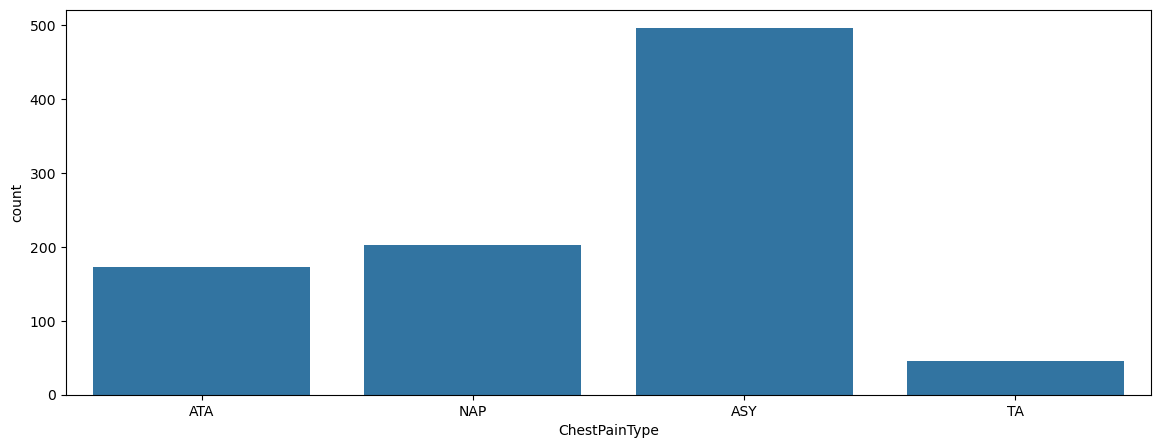

In [5]:
fig = plt.figure(figsize = (14, 5))
sns.countplot(x = df['ChestPainType'])
plt.show()

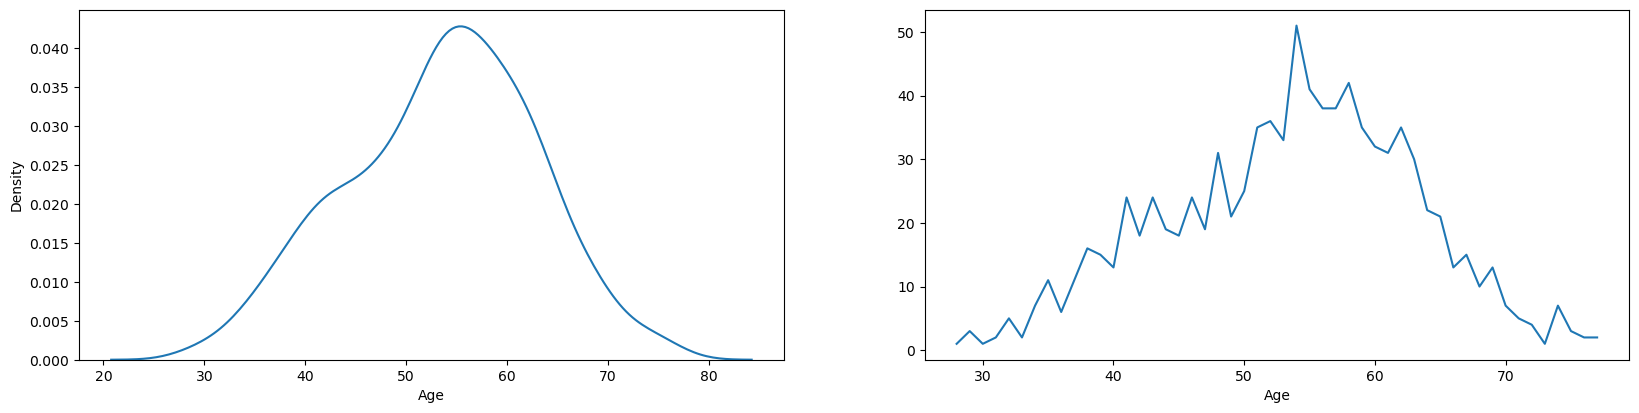

In [17]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age.dropna())

ax2 = fig.add_subplot(222)
df['Age'].value_counts().sort_index().plot.line()
plt.show()

C:\Users\79918\AppData\Local\Temp\ipykernel_24908\722680504.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, shade = True)


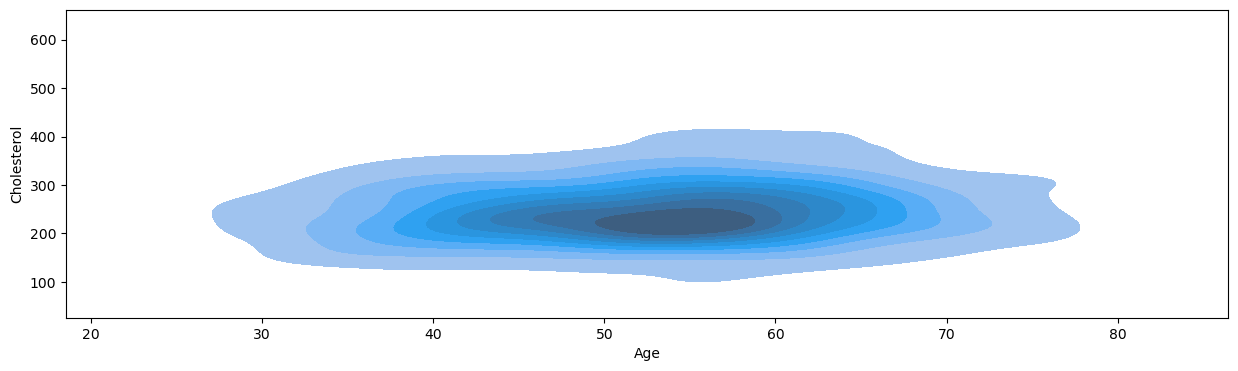

In [21]:
fig = plt.figure(figsize = (15, 4))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, shade = True)
plt.show()

C:\Users\79918\AppData\Local\Temp\ipykernel_24908\2663792314.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, shade = False)


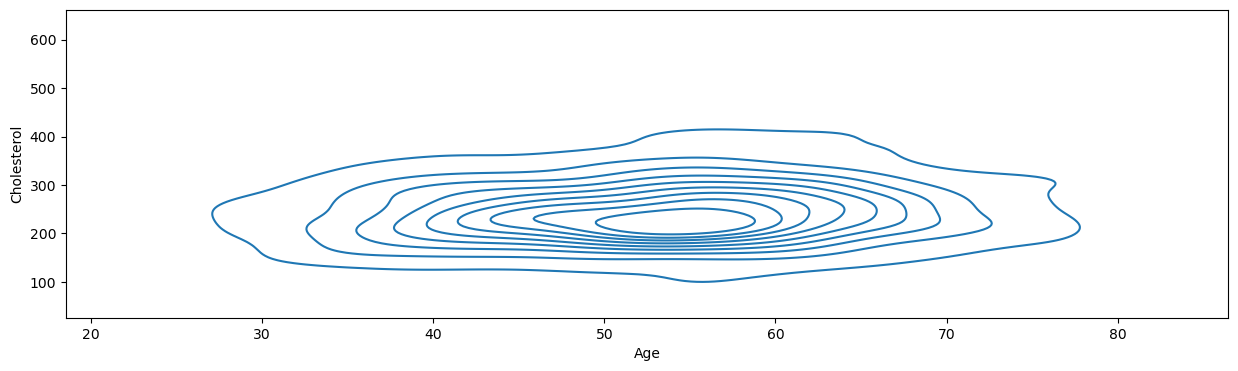

In [23]:
fig = plt.figure(figsize = (15, 4))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, shade = False)
plt.show()

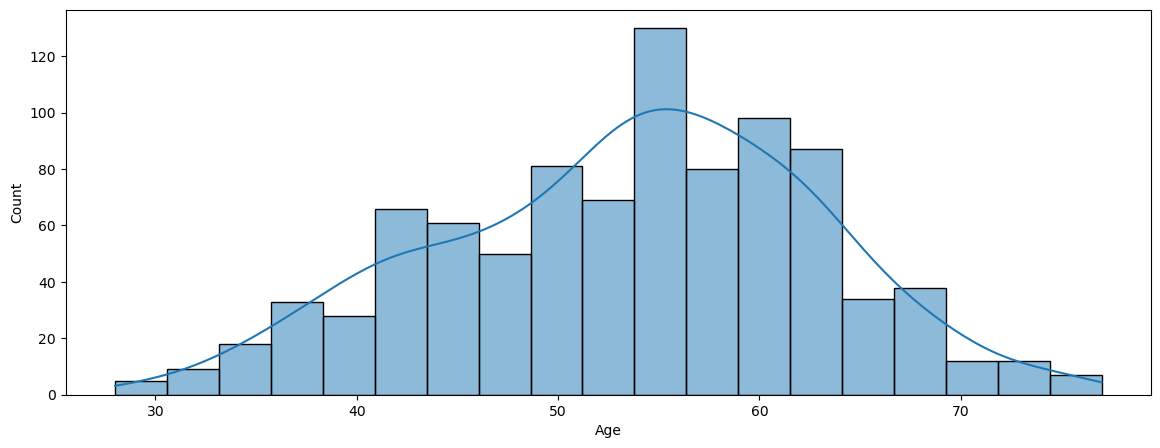

In [29]:
fig = plt.figure(figsize = (14, 5))
sns.histplot(df['Age'], kde = True)
plt.show()

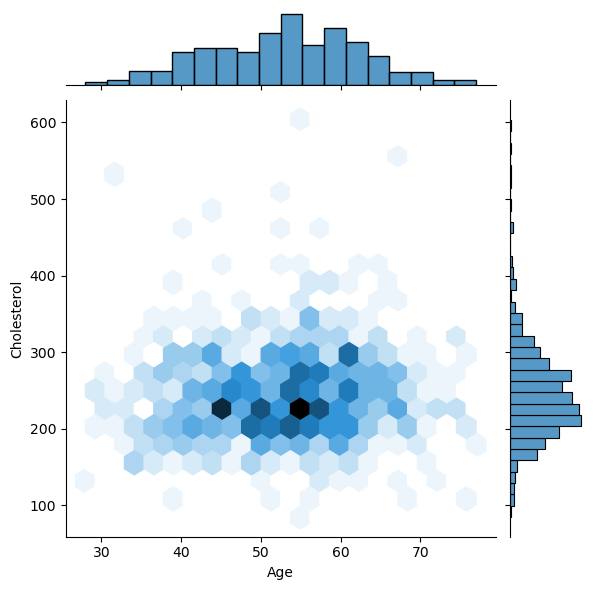

In [31]:
sns.jointplot(x='Age', y='Cholesterol', data = df, kind='hex', gridsize=20)
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

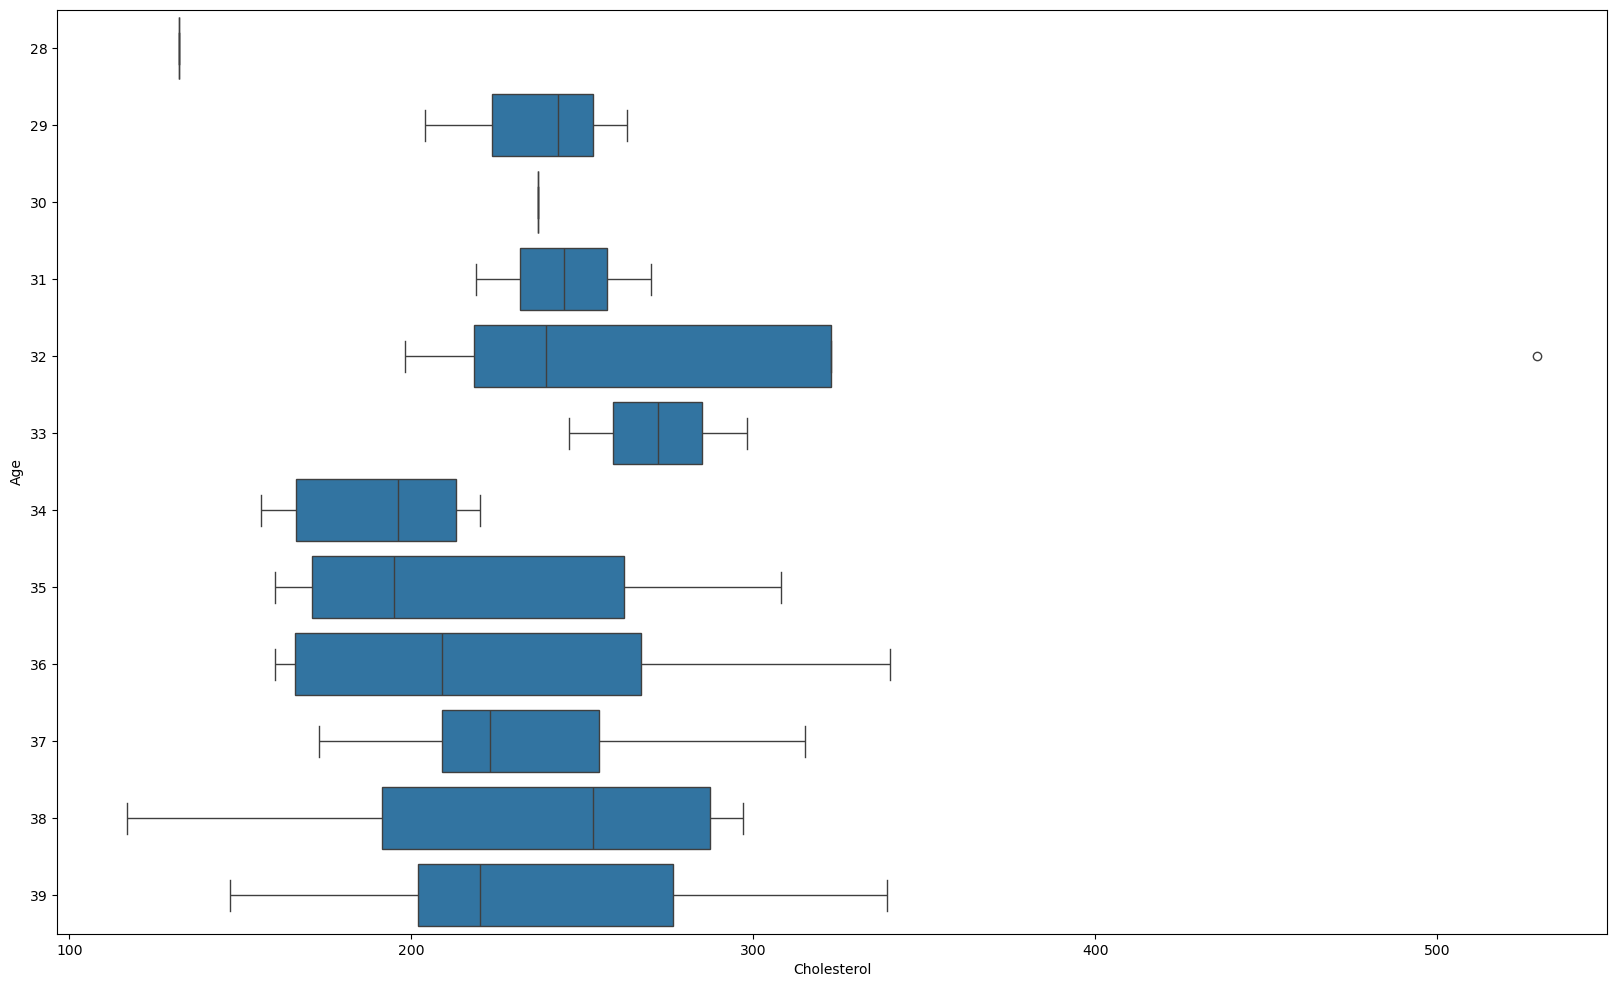

In [35]:
plt.figure(figsize = (20, 12))
sns.boxplot(y='Age', x='Cholesterol', data = df[df.Age.isin(np.arange(20, 40, 1))], orient = 'h')

<Axes: xlabel='Sex', ylabel='MaxHR'>

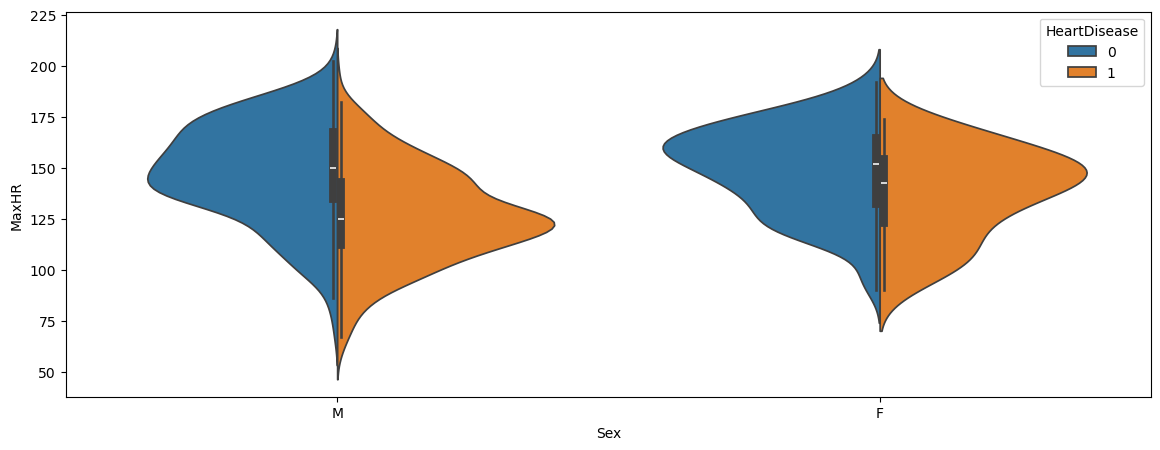

In [47]:
fig = plt.figure(figsize = (14, 5))
sns.violinplot(y='MaxHR', x='Sex', hue='HeartDisease', split=True, data = df)

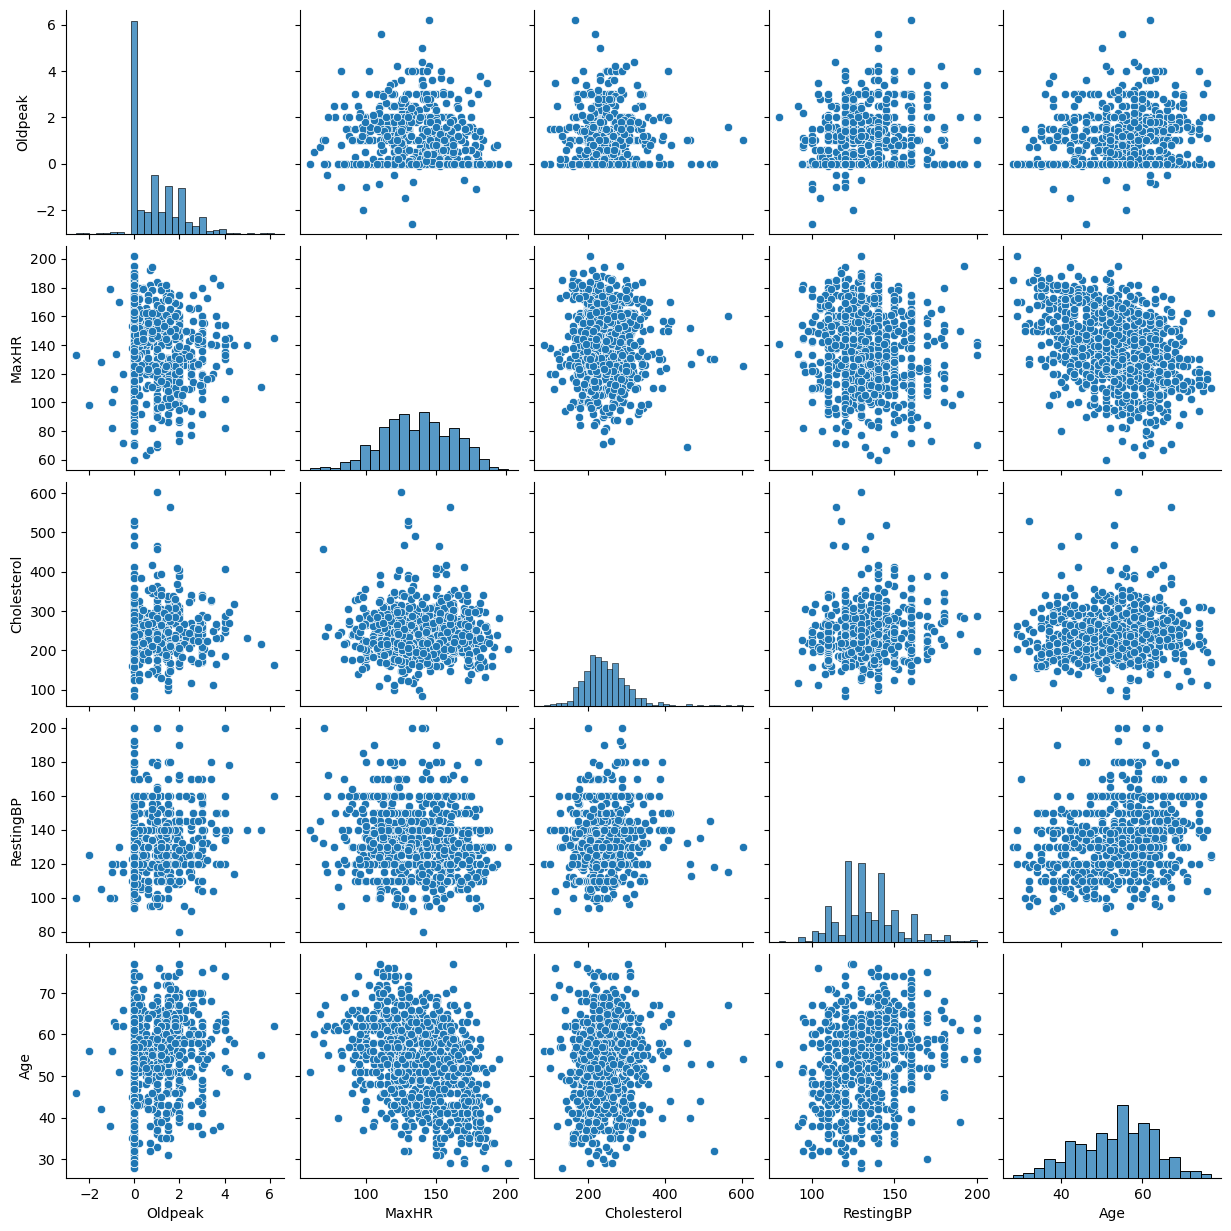

In [49]:
cols = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(df[cols])

In [51]:
df[cols].dropna().corr()

Oldpeak     MaxHR  Cholesterol  RestingBP       Age
Oldpeak      1.000000 -0.259533     0.058488   0.198575  0.286006
MaxHR       -0.259533  1.000000    -0.019856  -0.125774 -0.382112
Cholesterol  0.058488 -0.019856     1.000000   0.095939  0.058758
RestingBP    0.198575 -0.125774     0.095939   1.000000  0.259865
Age          0.286006 -0.382112     0.058758   0.259865  1.000000

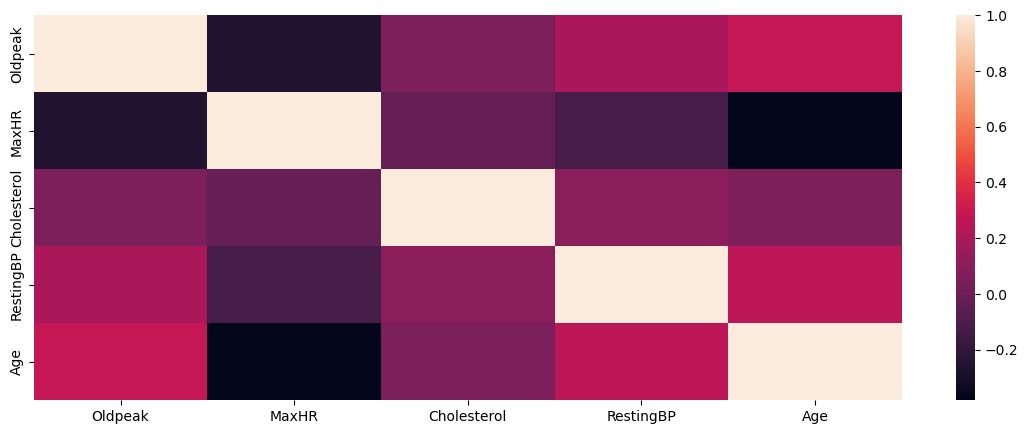

In [53]:
#Тепловая карта
fig = plt.figure(figsize = (14, 5))
sns.heatmap(df[cols].dropna().corr())
plt.show()

## Plotly

In [56]:
import plotly.express as px
import plotly as py

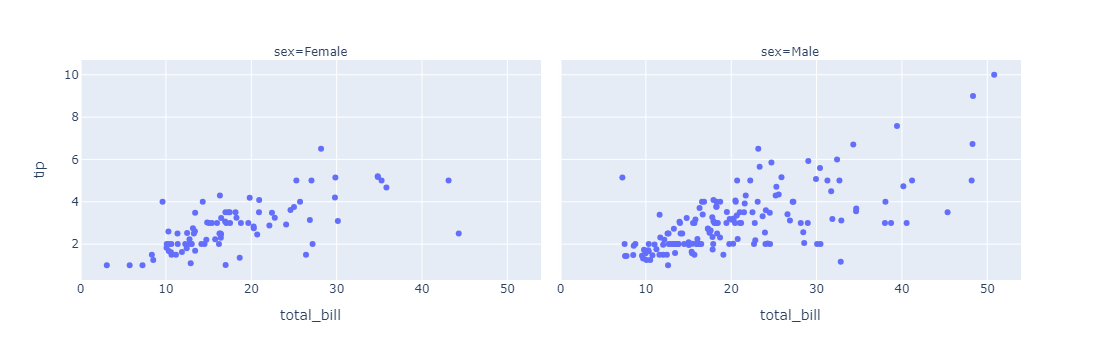

In [60]:
df = px.data.tips()
fig = px.scatter(df, x='total_bill', y='tip', facet_col = 'sex')
fig.show()

In [62]:
#Используя различные параметры можно добиться более интересной визуализации
#Можно добавить ось времени 